In [1]:
import sys
sys.path.append("./defect_atom_diag")

In [10]:
import numpy as np
from apply_sym_wan import make_ylm_wanns
from matplotlib import pyplot as plt
from matplotlib import rcParams
from functools import lru_cache as cache

In [11]:
# constants:
N_MESH: int = 100

In [12]:
default_params = {
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'font.size': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'xtick.top': True,  # draw ticks on the top side
    'xtick.major.top': True,
    'font.family': "Times New Roman",
    'mathtext.fontset': "stix",
    'mathtext.tt': "Times New Roman",
    'axes.linewidth': 1, 
    'xtick.major.width': 1,
    'xtick.major.size': 3,
    'xtick.direction': "in",
    'ytick.major.width': 1,
    'ytick.major.size': 3,
    'ytick.direction': "in",
    'ytick.right': True,
    'figure.dpi': 600,
}
rcParams.update(default_params)

In [13]:
@cache
def ylm_wrapper(ll, rad_scale):
    return make_ylm_wanns(ll, (N_MESH,)*3, 
                          "cubic", rad_scale)

In [14]:
def plot_cmap(ll, rad_scale, axis=0, nrow_ncol=None,
              figsize=(8, 8), num_ticks=5, wspace=None,
              hspace=None, savefig=True):
    # param checking:
    if axis > 2 or axis < 0:
        raise ValueError("axis number must be between 0 and 2")
        
    # generate data:
    ylm, delr = ylm_wrapper(ll, rad_scale)
    
    # generate subplots:
    nrow_ncol = nrow_ncol or (1, 2*ll+1)
    nrow, ncol = nrow_ncol
    fig, axes = plt.subplots(nrow, ncol, 
                             sharex=True, sharey=True,
                             figsize=figsize,
                             constrained_layout=True)
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes], dtype=object)
    axes = axes.flatten()
    
    # index slice for array:
    idx = ylm[0].shape[axis] // 2
    sl = tuple(slice(None) if i != axis else idx \
               for i in range(3))
    
    # labelling:
    dims = "xyz"[:axis] + "xyz"[axis+1:]
    xlabel, ylabel = dims
    
    # extent of image:
    del_x, del_y = delr[:axis] + delr[axis+1:]
    xlim = [-1, 1]
    ylim = [-1, 1]
    extent = [-1-del_x/2, 1+del_x/2, -1-del_y/2, 1+del_y/2]
    
    # start plotting:
    num_plots = 2*ll + 1
    for i, ax in enumerate(axes):
        if i >= num_plots:
            ax.axis('off')
            continue
            
        m = range(-ll, ll+1)[i]
        pdf = ylm[i]**2  # take probability density
        data = pdf[sl]
        
        # plot:
        ax.imshow(data, cmap="inferno", extent=extent)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        
        xticks = np.linspace(*xlim, num_ticks)
        yticks = np.linspace(*ylim, num_ticks)

        ax.set_xticks(xticks)
        ax.set_yticks(yticks)
        
        # plot xy labels only if necessary:
        ax.set_xlabel(xlabel if i // ncol == nrow - 1 else "")
        ax.set_ylabel(ylabel if i % ncol == 0 else "")
        
        # set label
        ax.text(x=0.05, y=0.95, s=r"$m=" + str(m) + r"$", 
                transform=ax.transAxes, va="top", 
                ha="left", color="w")
    fig.suptitle(fr"$ l = {ll}, ~ \alpha = {rad_scale}$")
    if savefig:
        fig.savefig(f"l_{ll}_alpha_{rad_scale}.pdf")
    return fig, axes

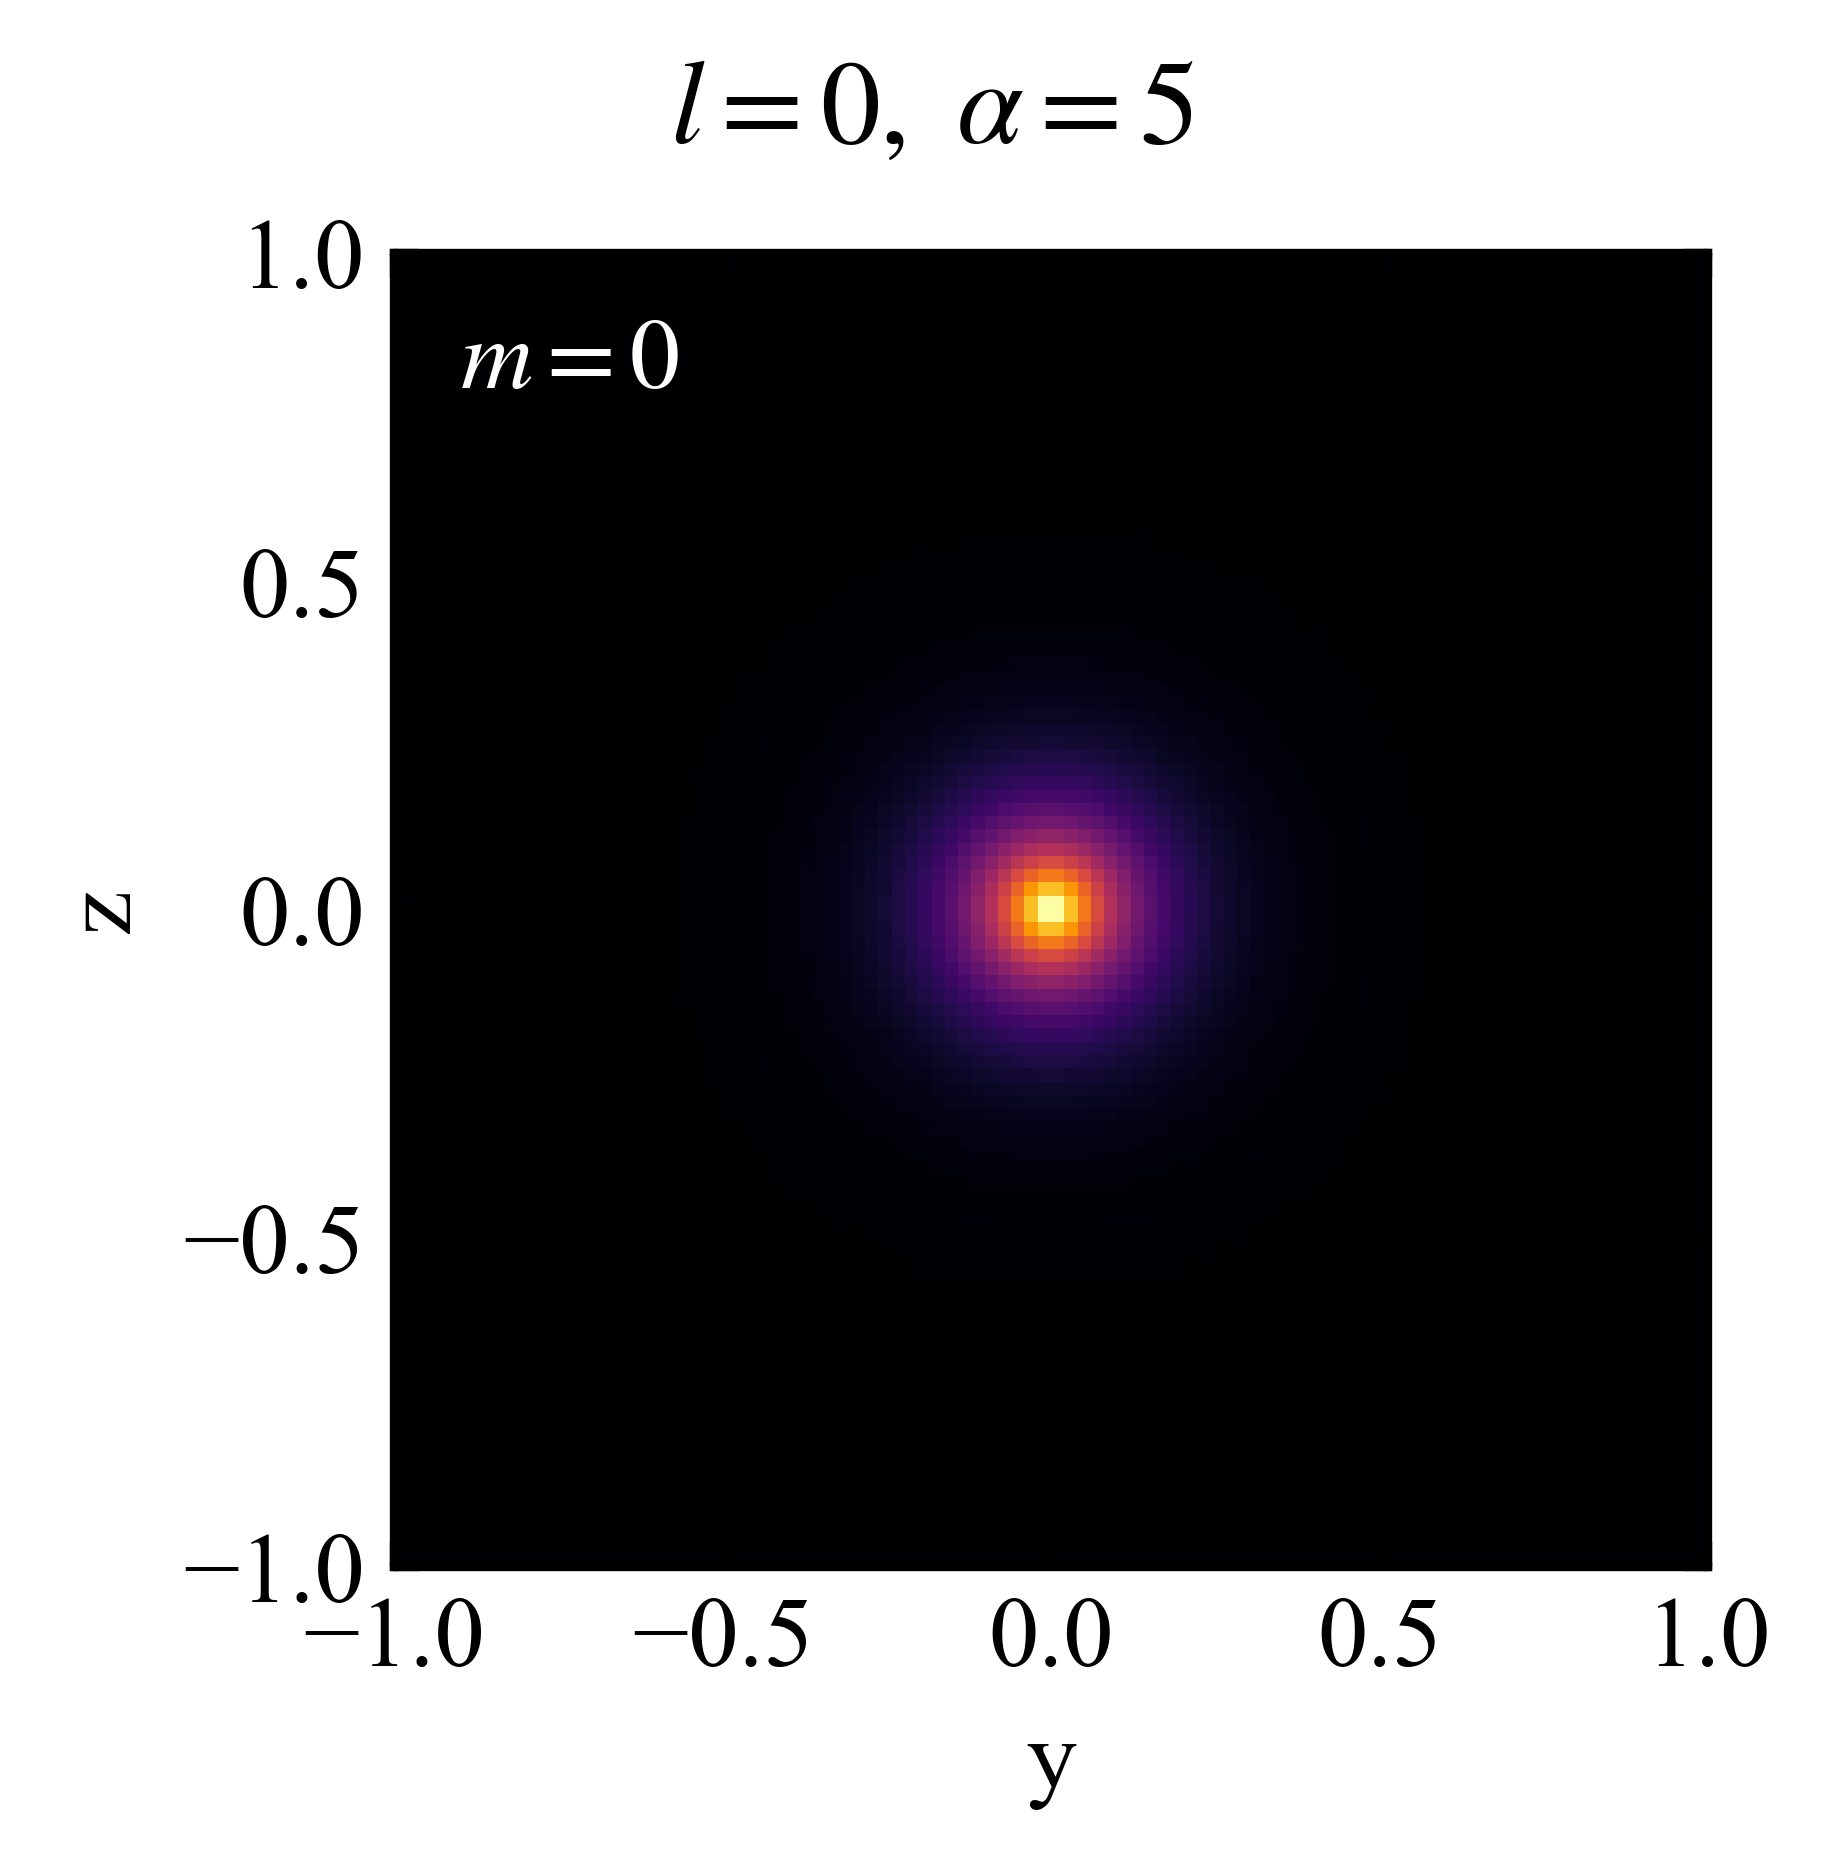

In [23]:
fig, axes = plot_cmap(0, 5, axis=0, nrow_ncol=(1, 1), 
                      figsize=(3, 3))

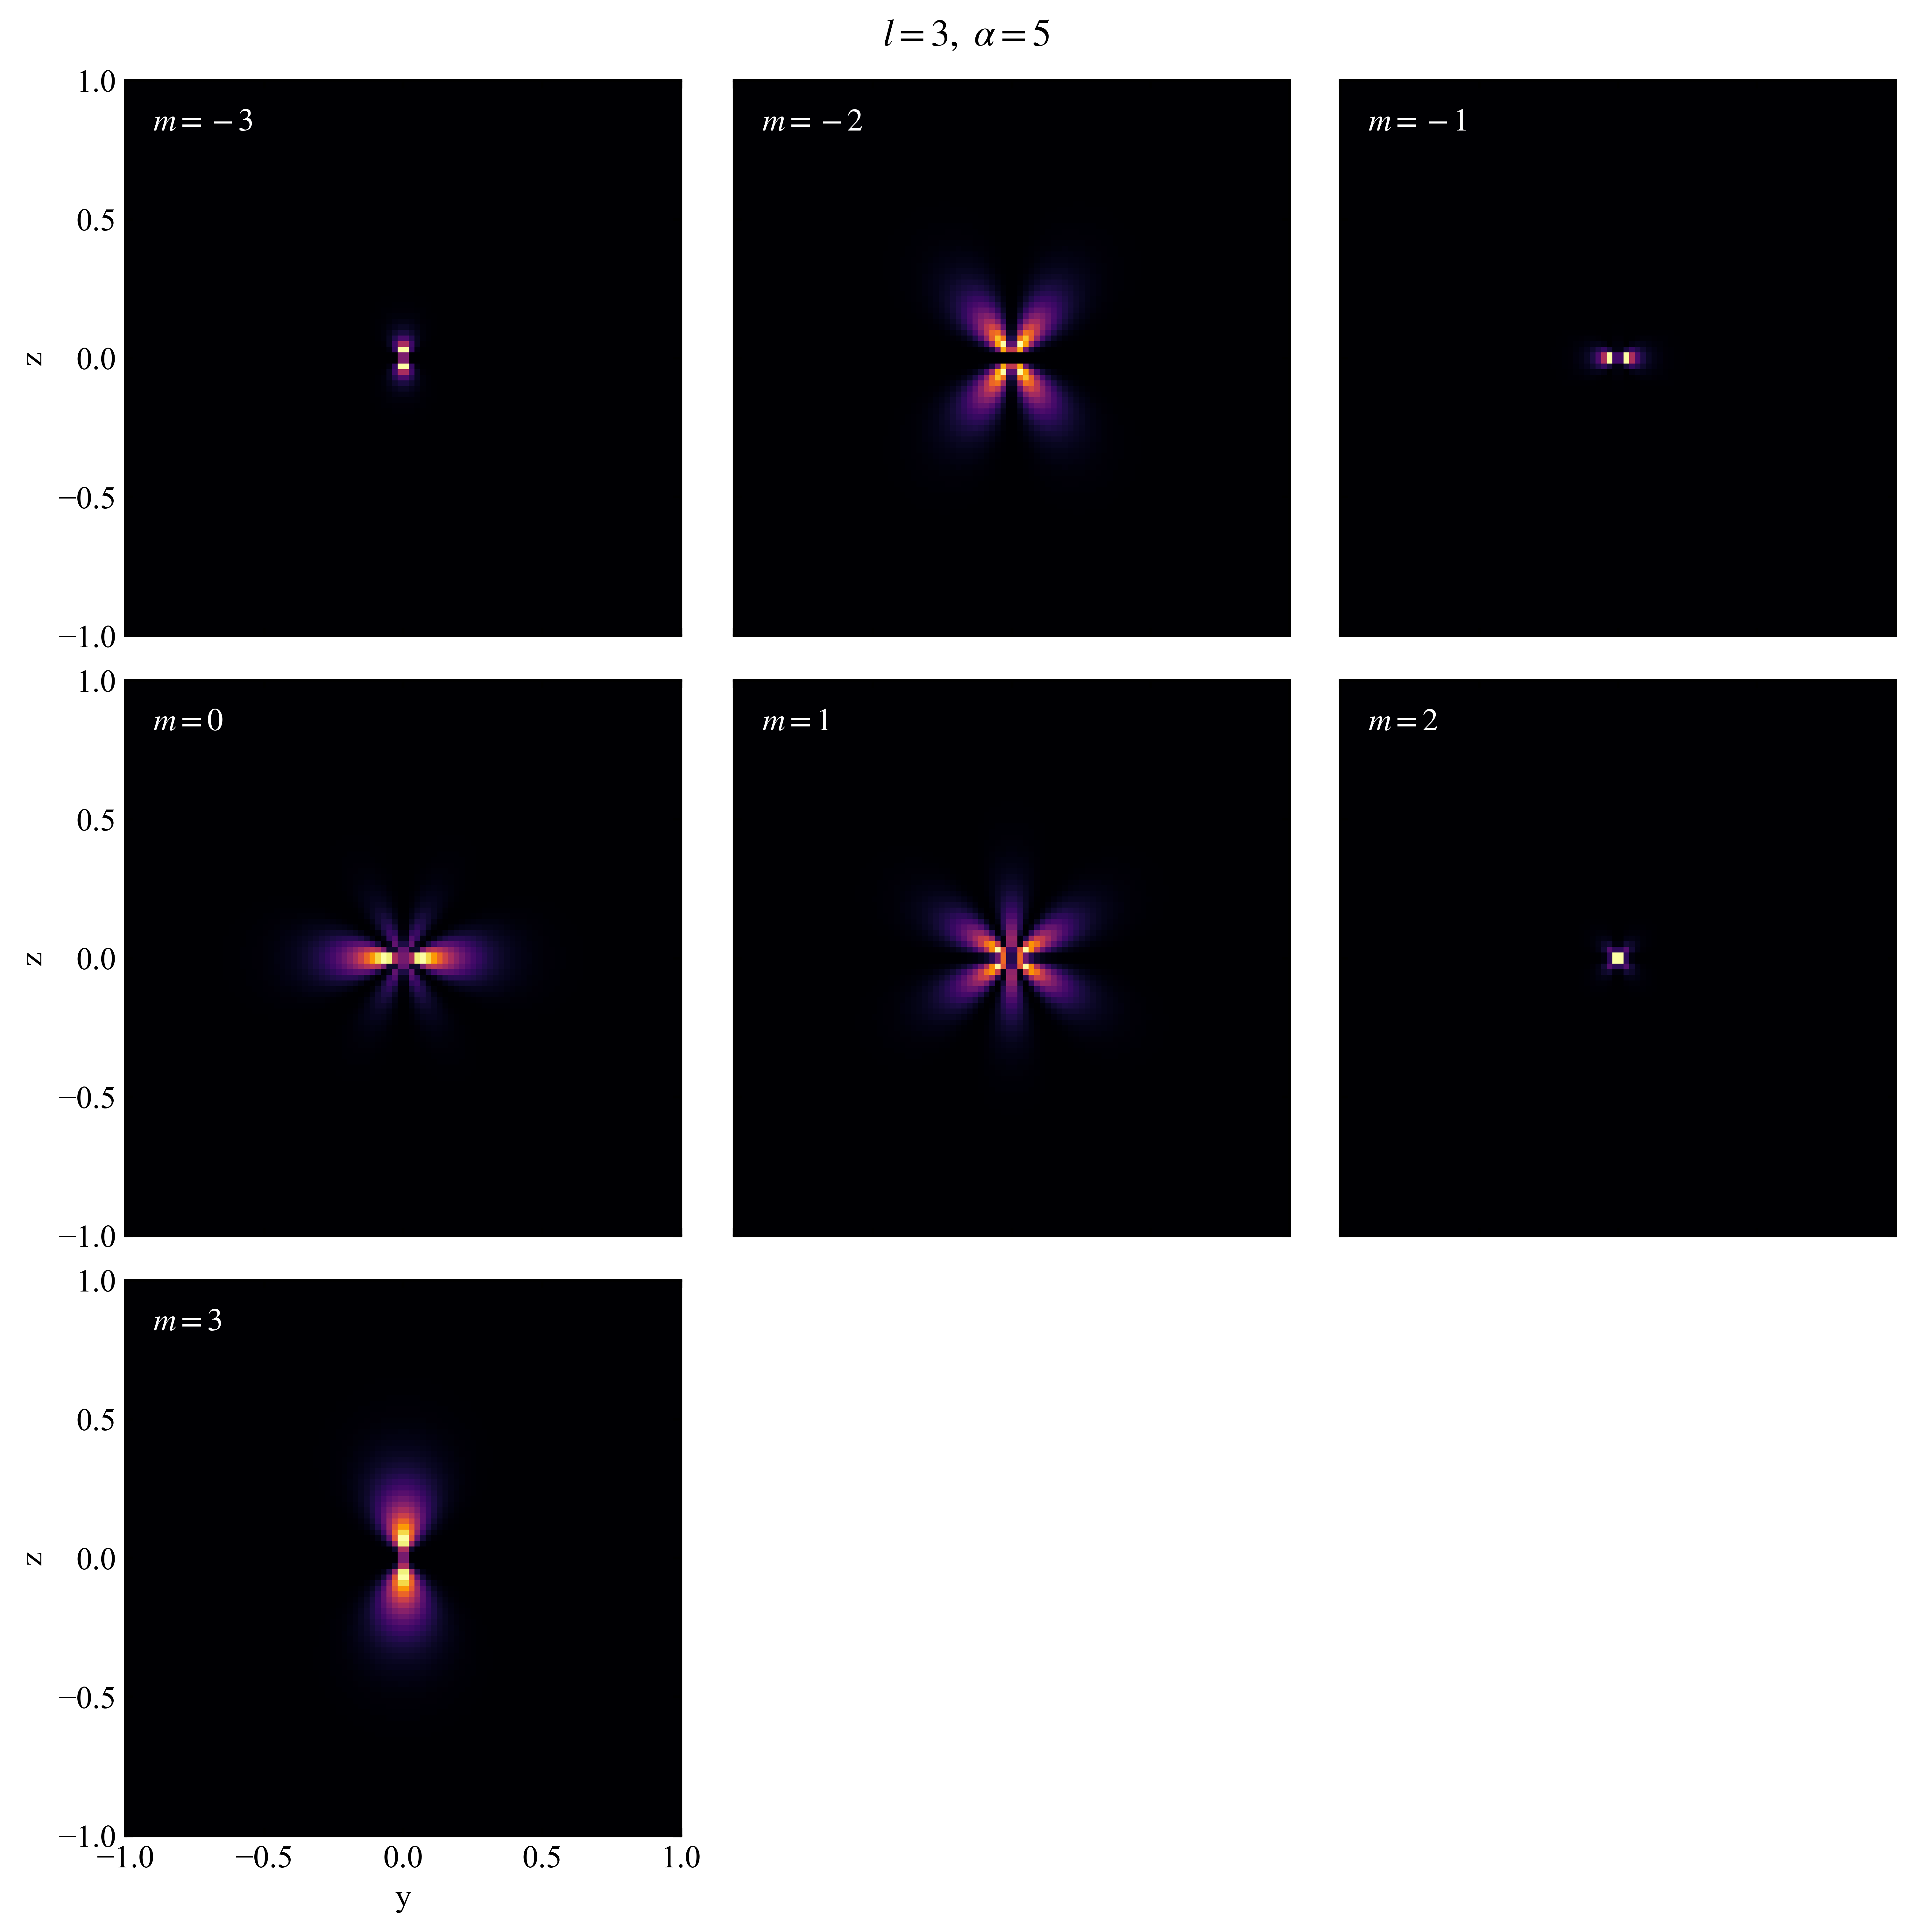

In [24]:
fig, axes = plot_cmap(3, 5, axis=0, nrow_ncol=(3, 3), 
                    figsize=(10, 10))

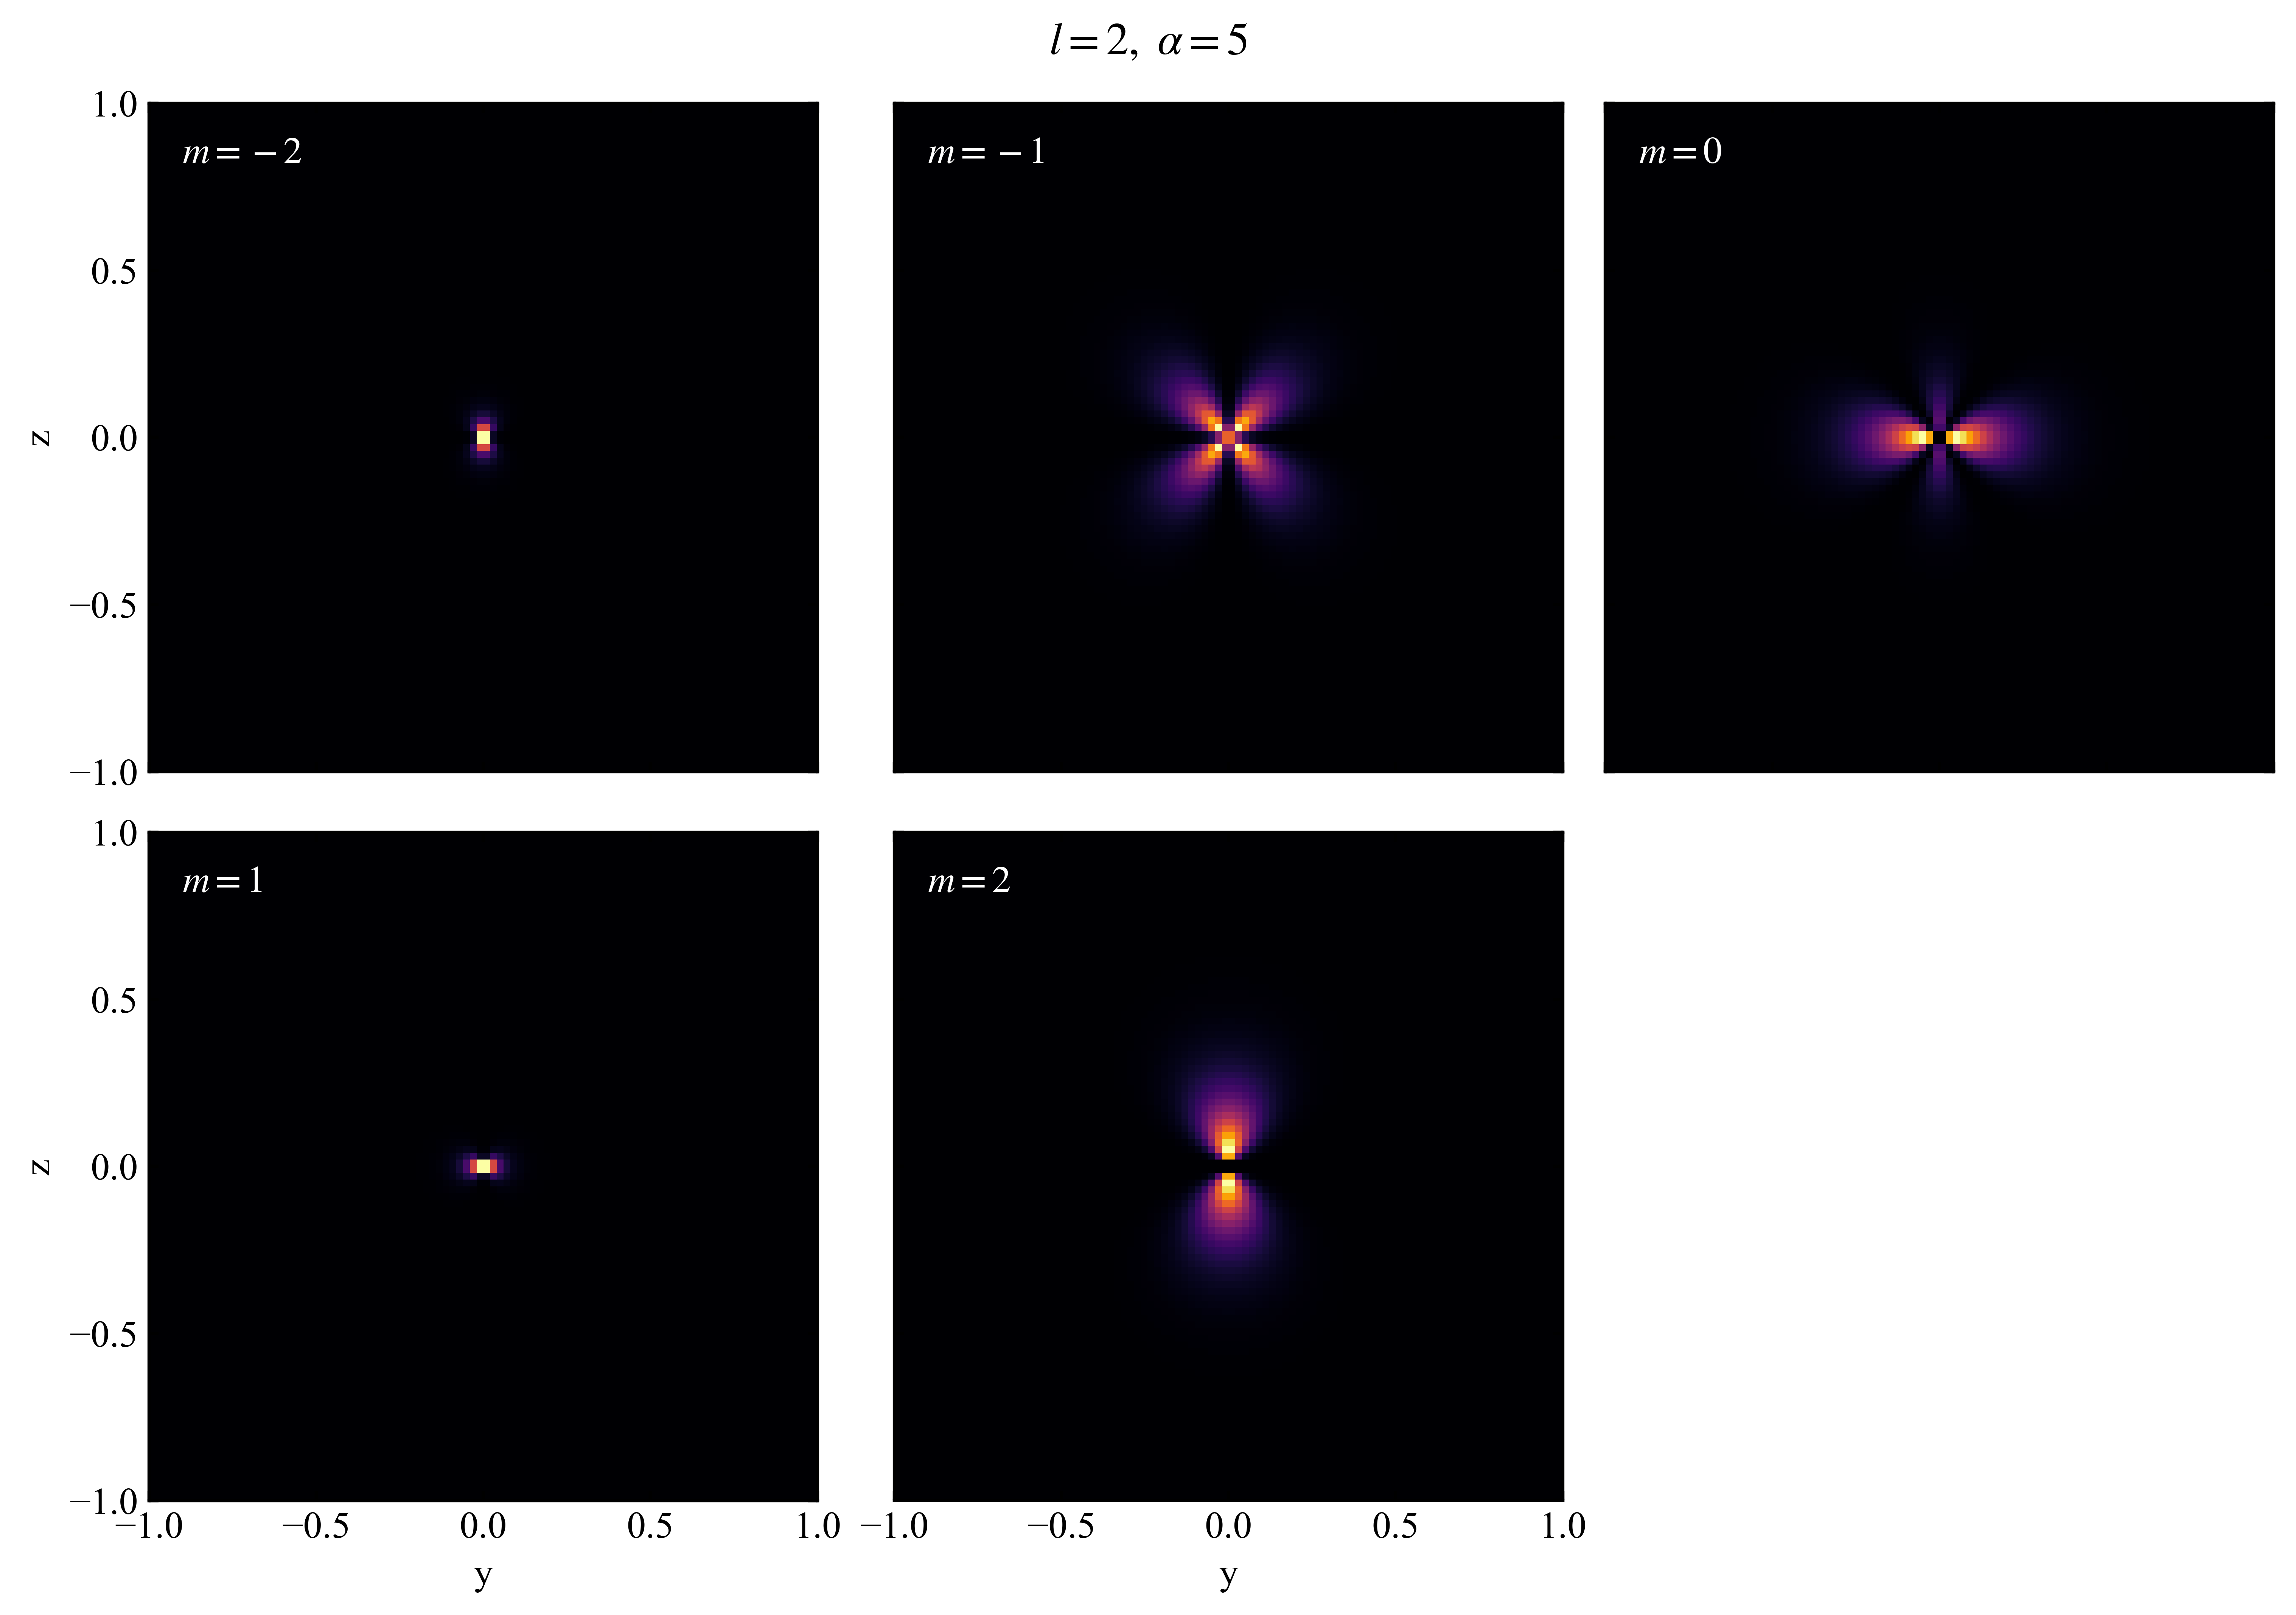

In [25]:
fig, axes = plot_cmap(2, 5, axis=0, nrow_ncol=(2, 3), 
                    figsize=(10, 7))

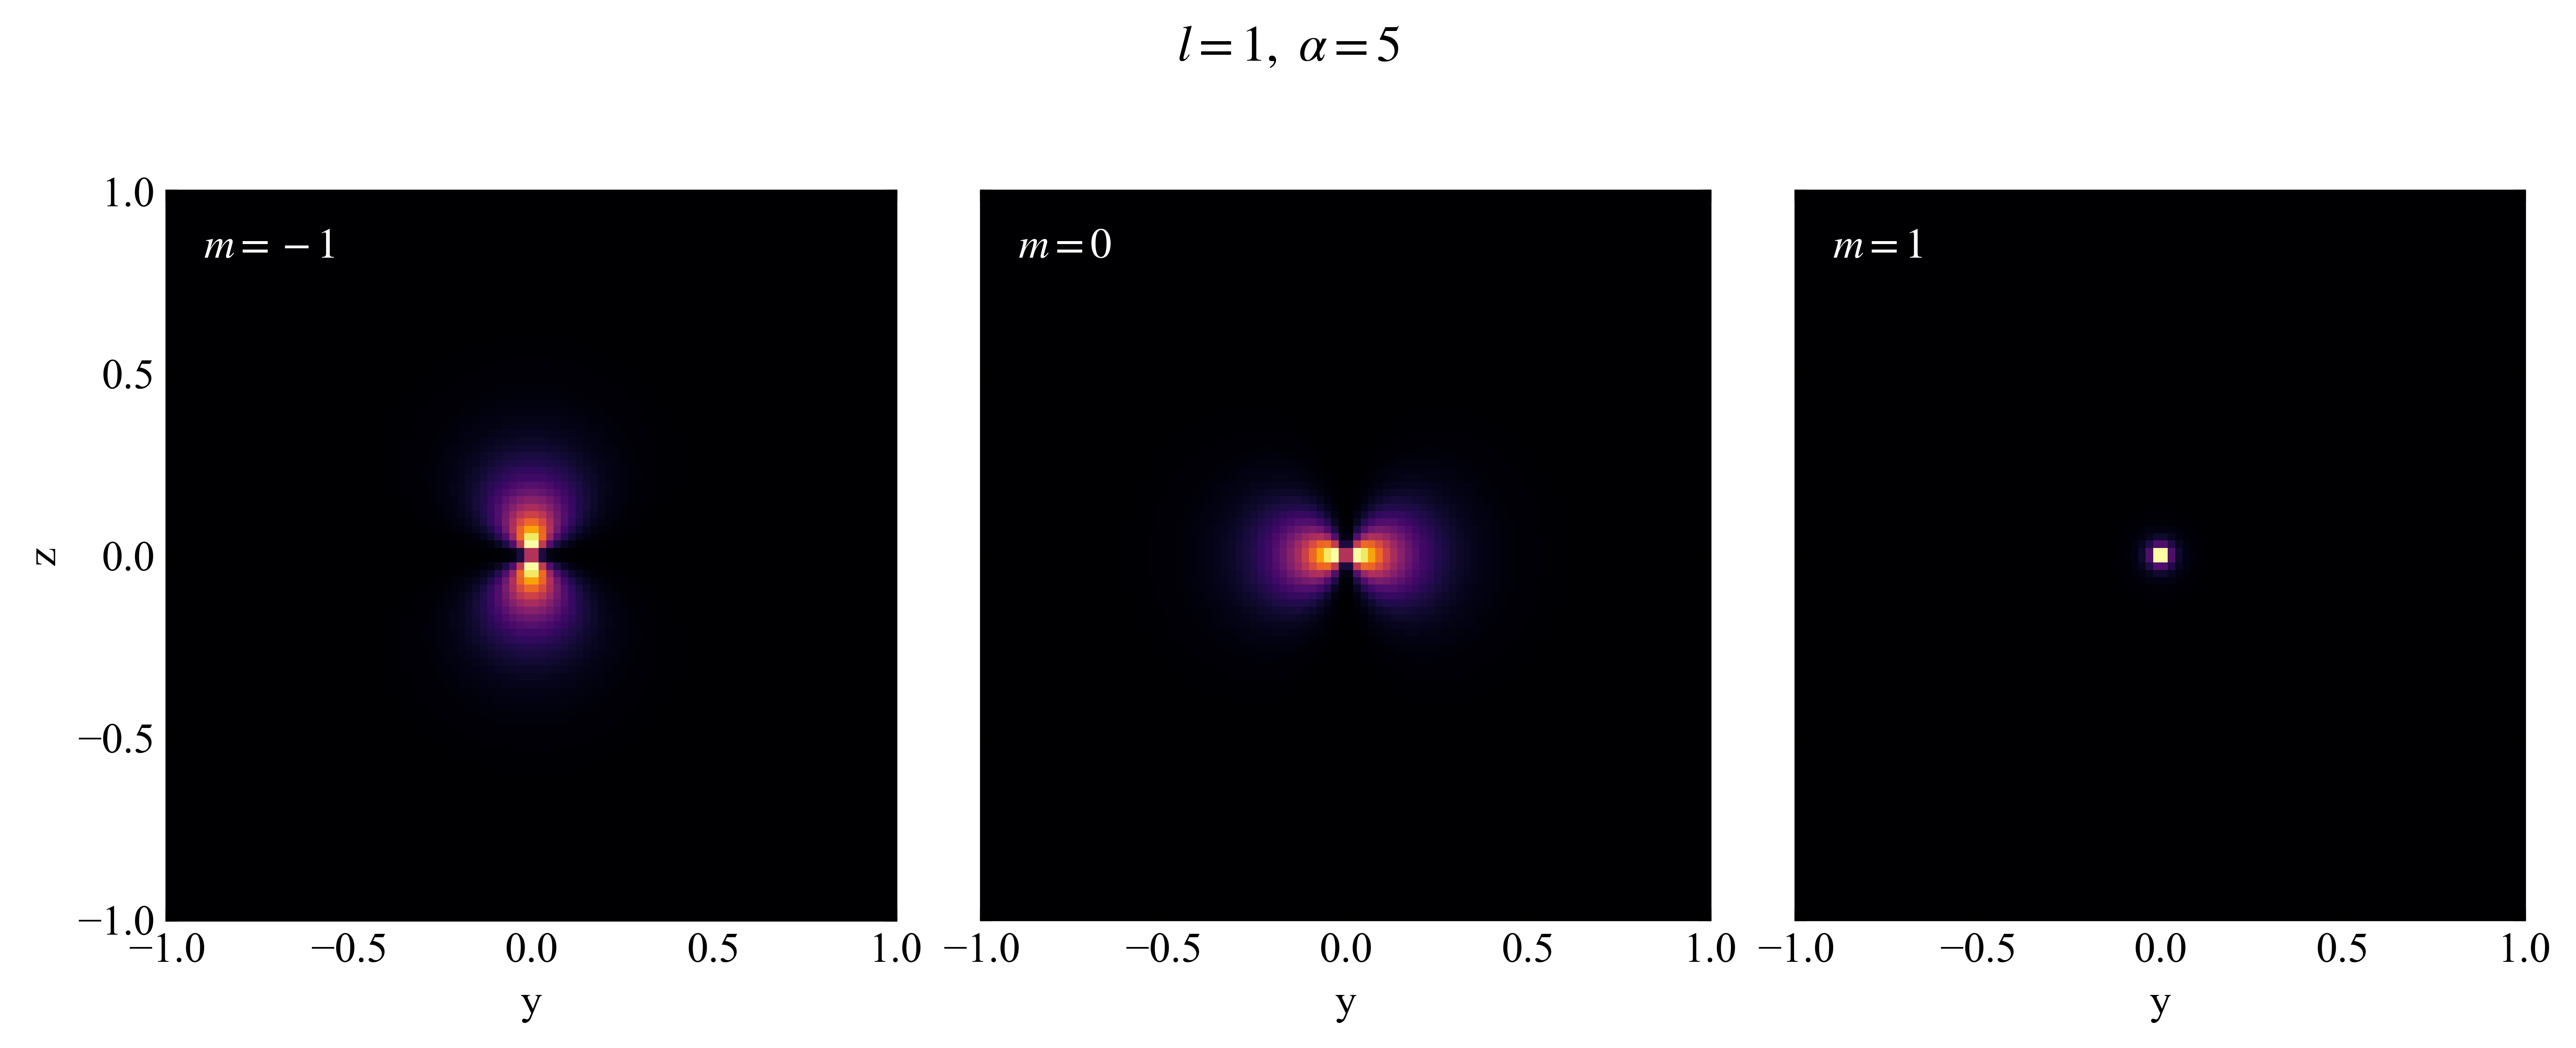

In [33]:
fig, axes = plot_cmap(1, 5, axis=0, nrow_ncol=(1, 3), 
                    figsize=(10, 4))

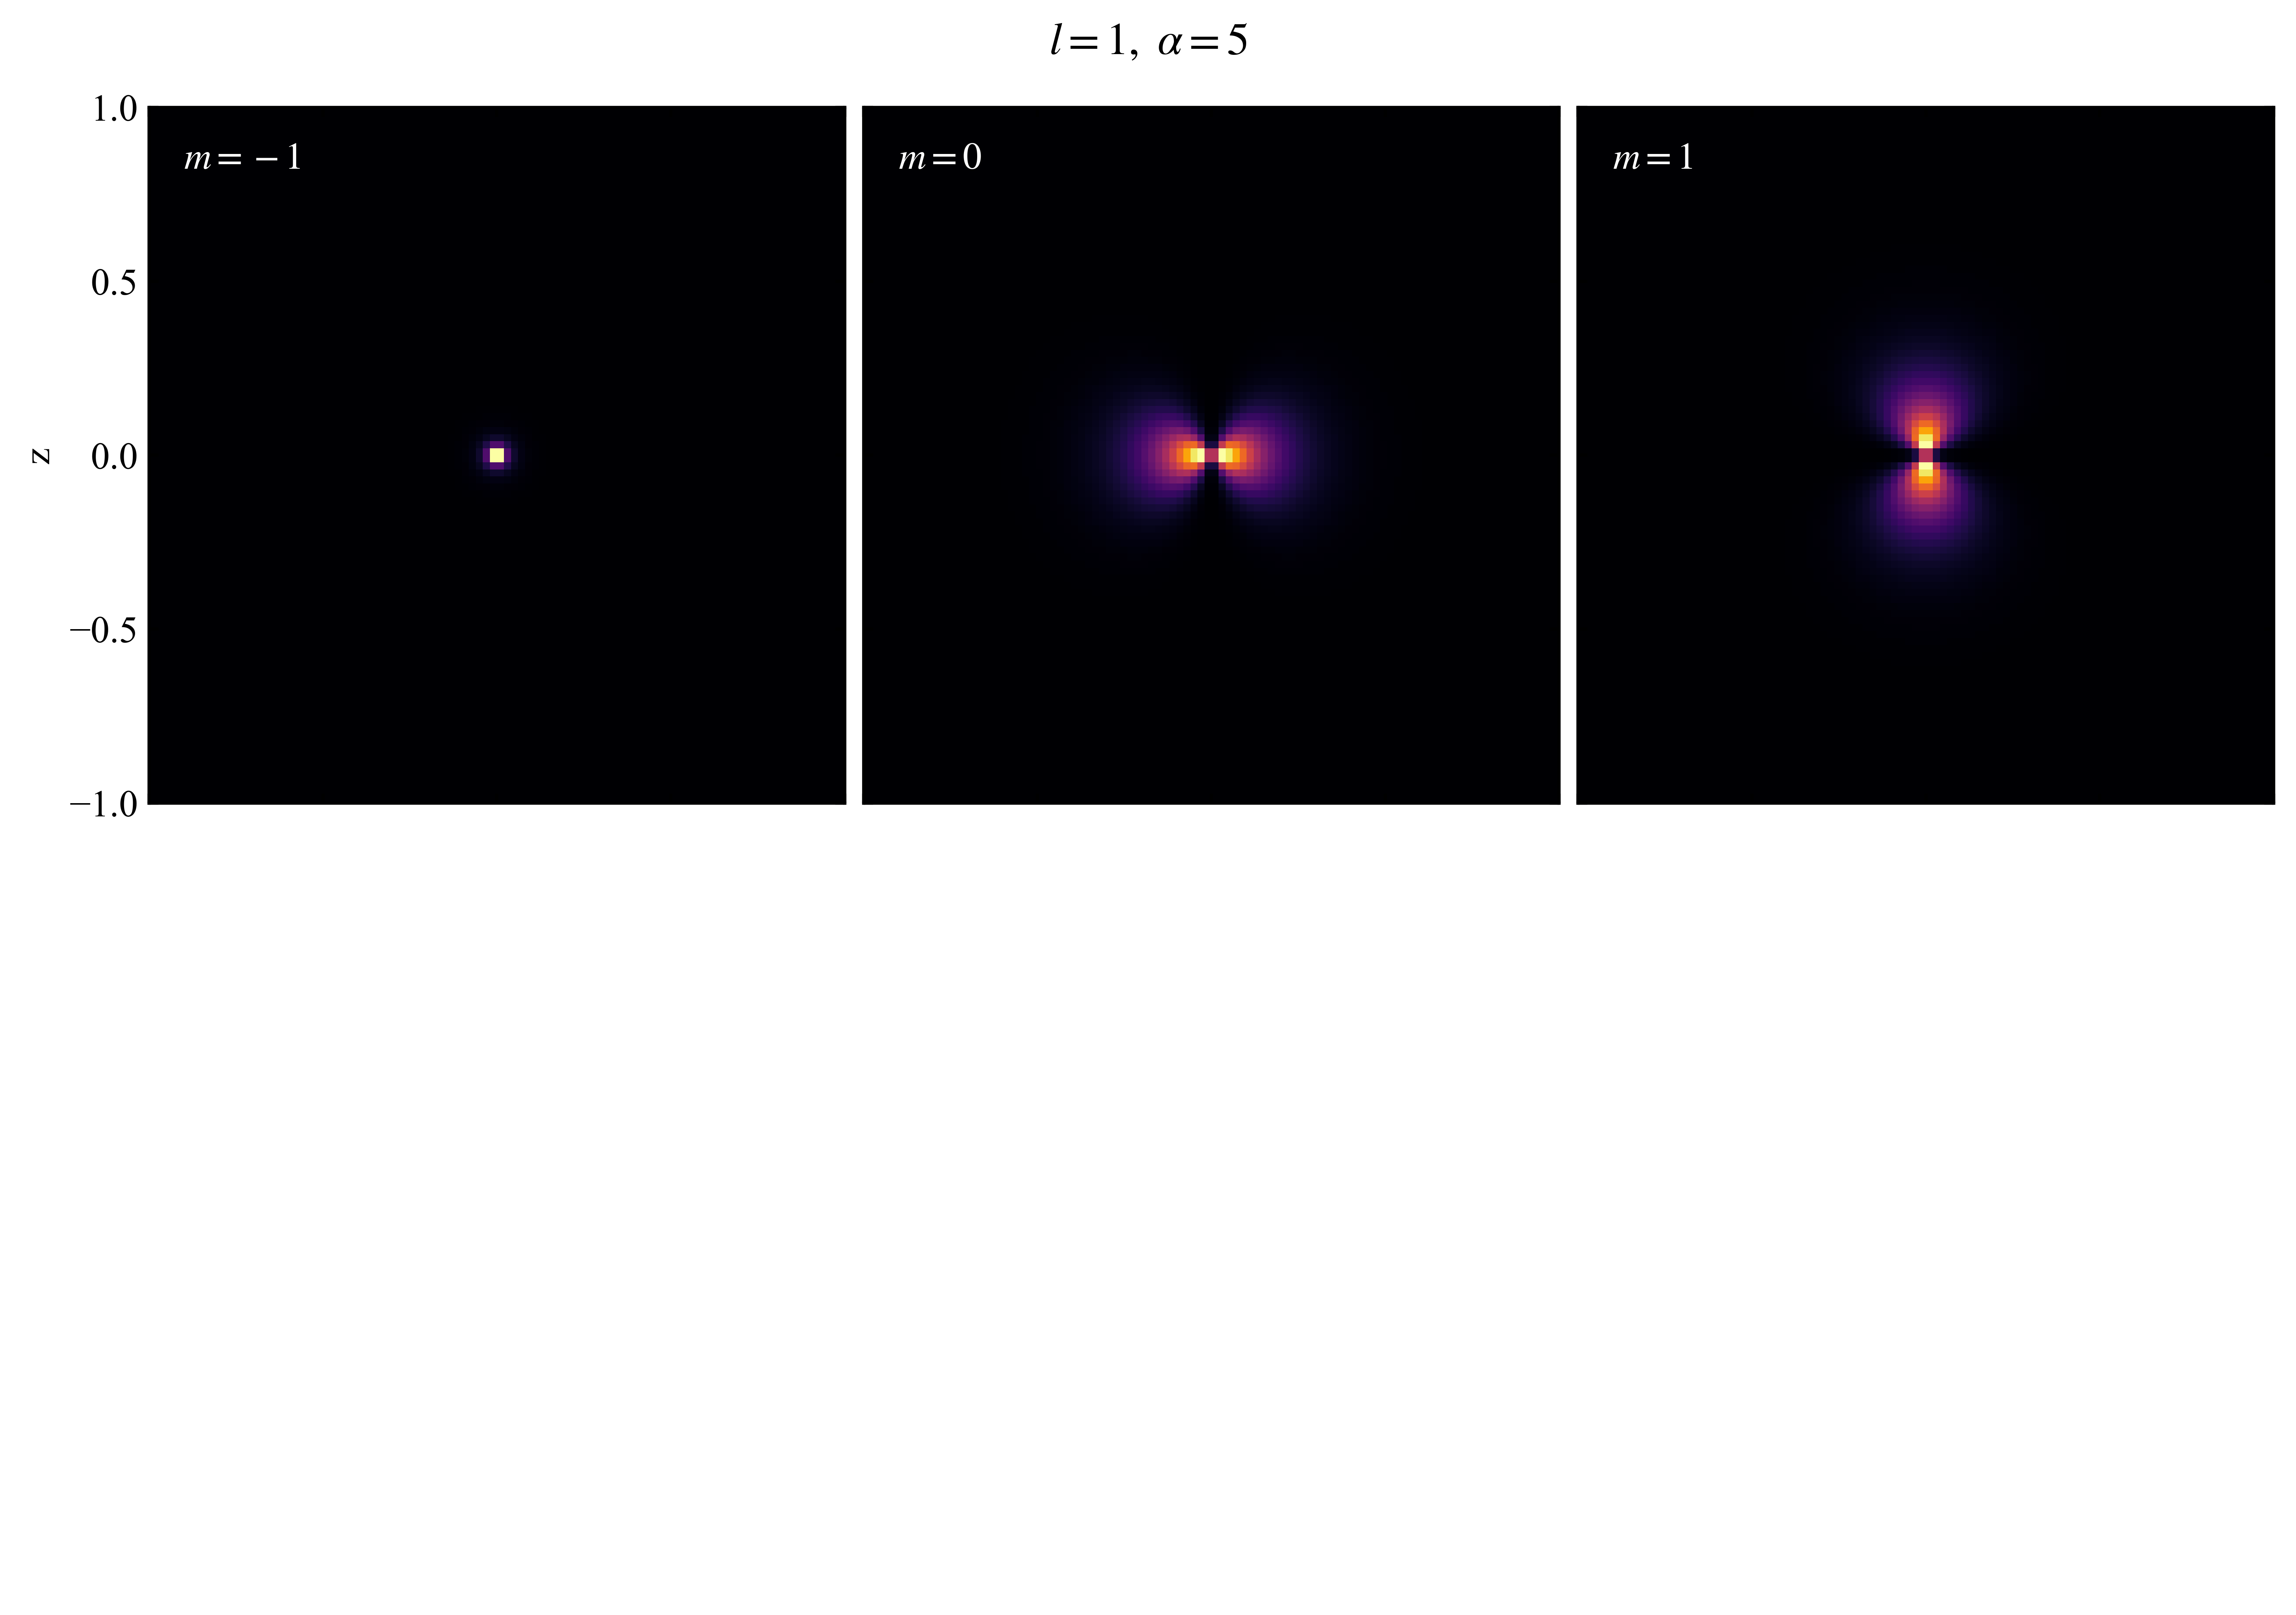

In [27]:
fig, axes = plot_cmap(1, 5, axis=1, nrow_ncol=(2, 3), 
                    figsize=(10, 7))

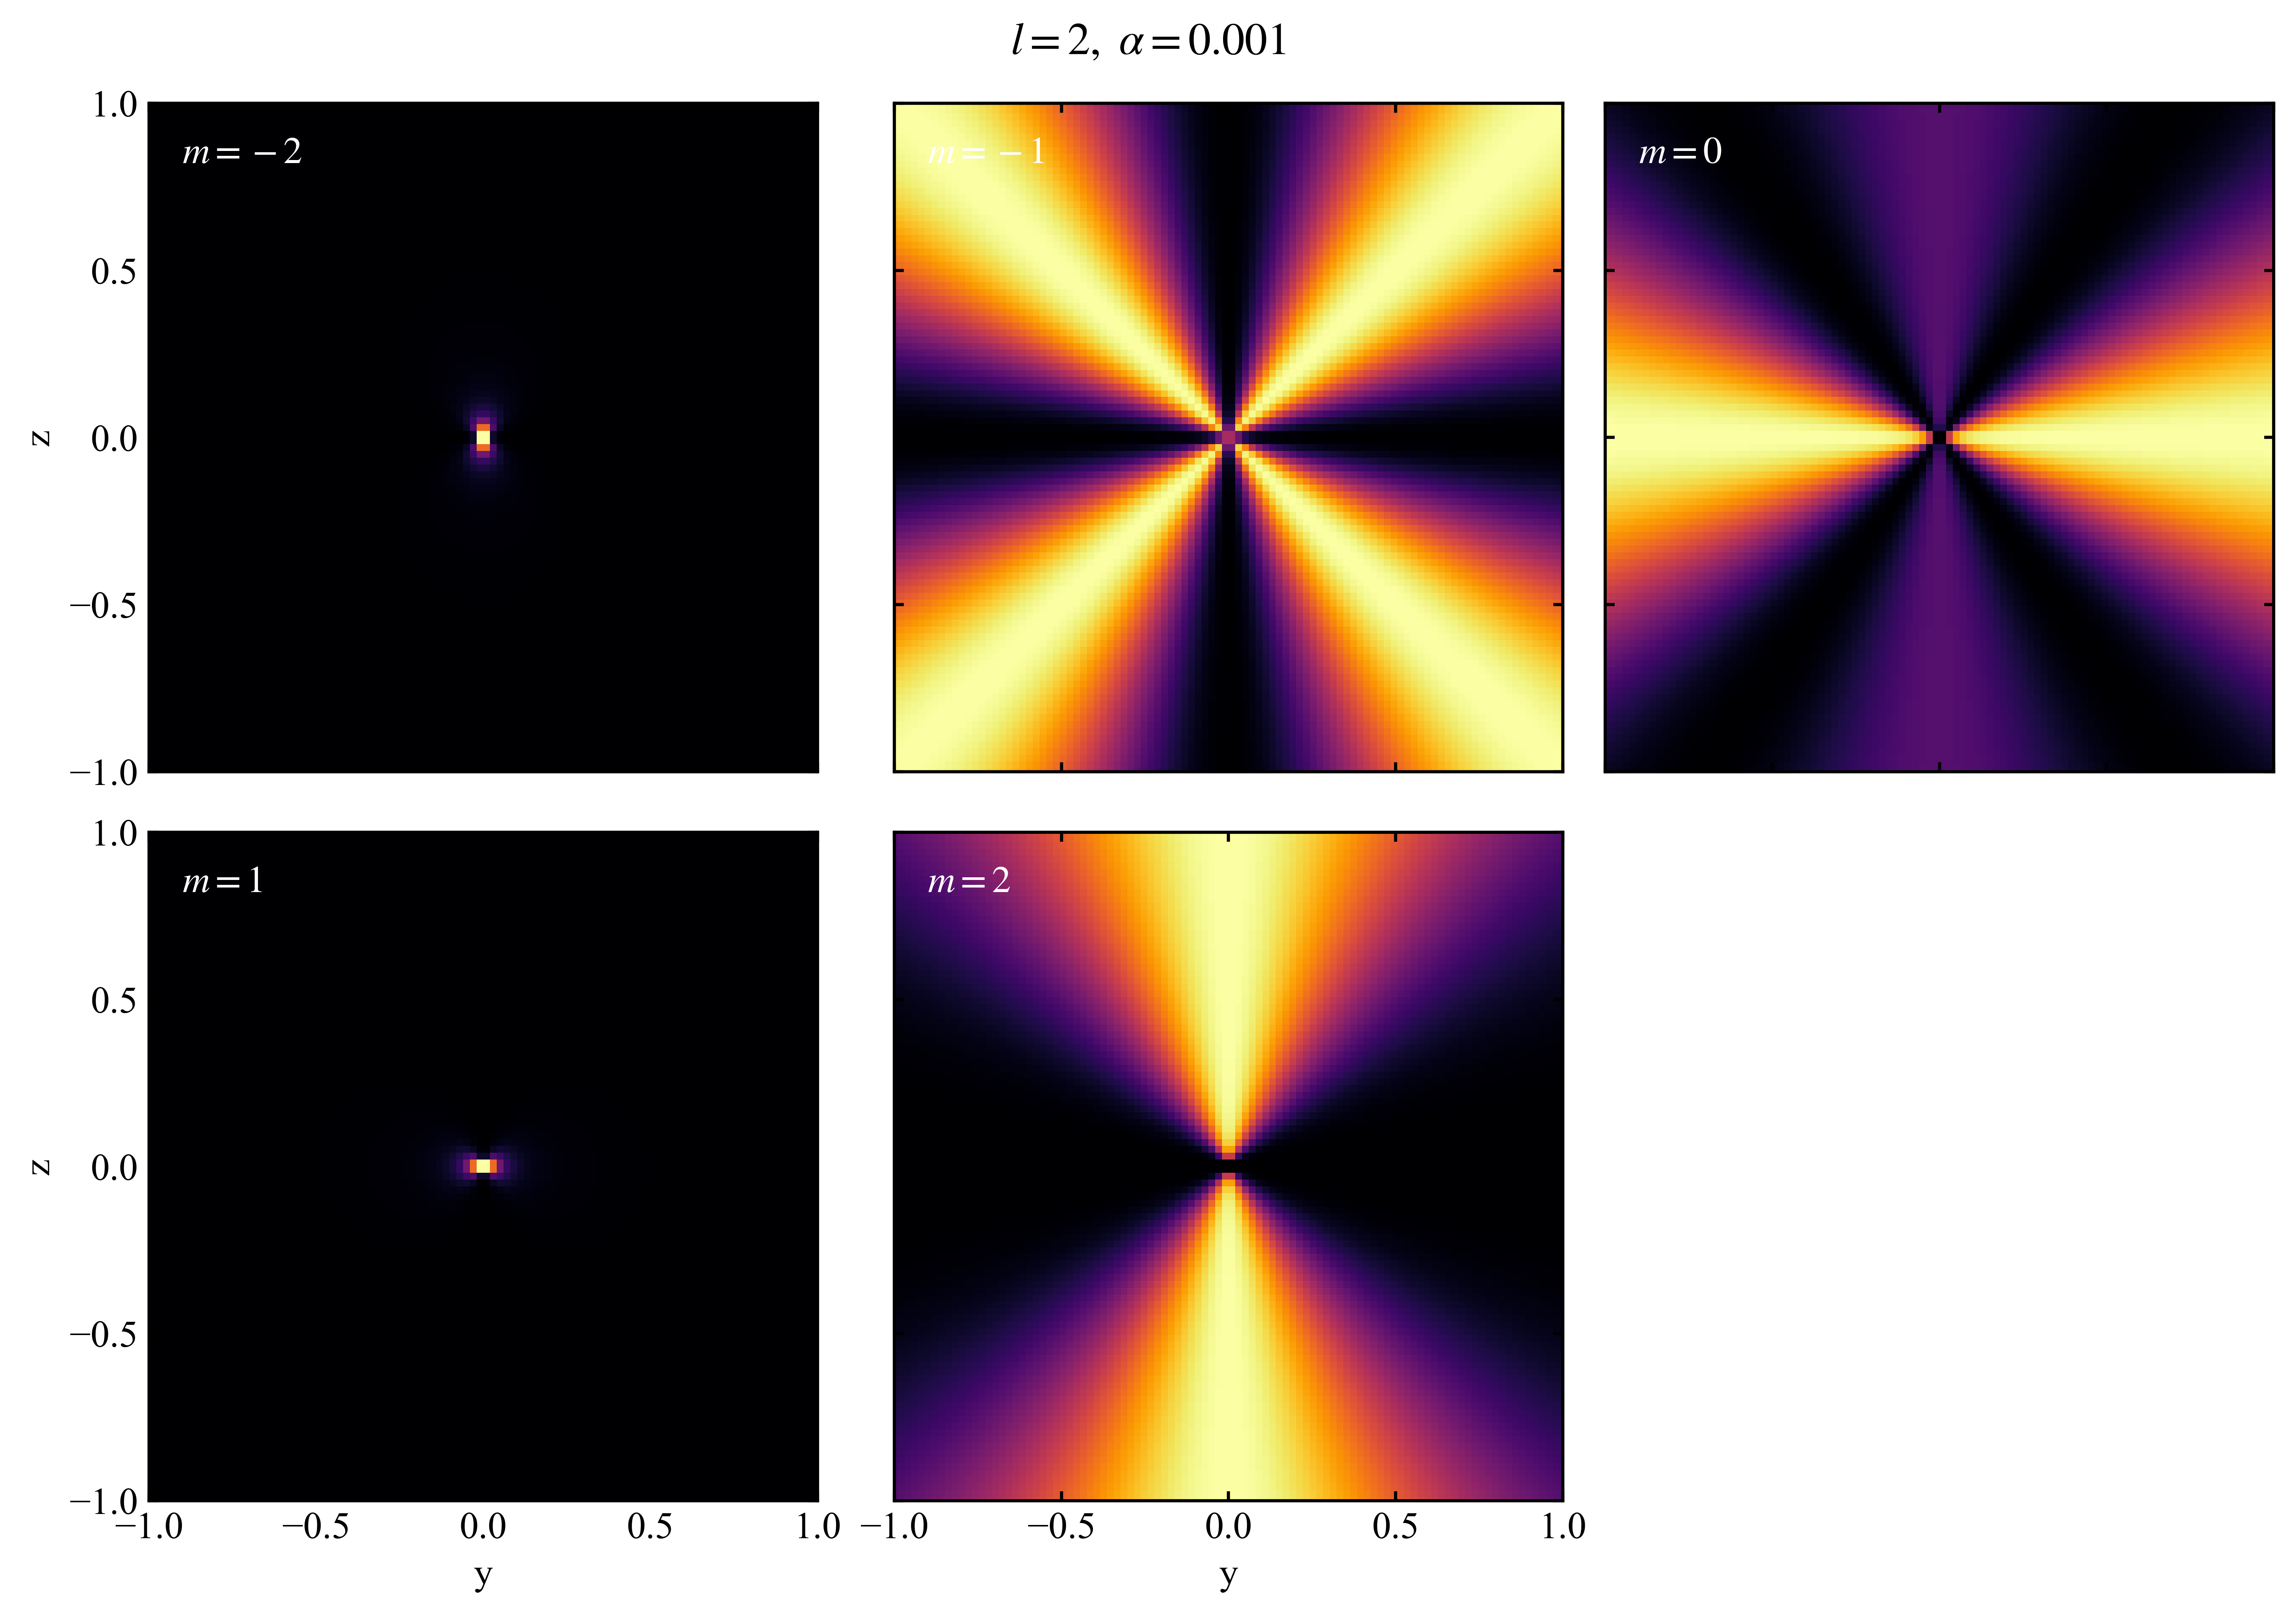

In [21]:
fig, axes = plot_cmap(2, 0.001, axis=0, nrow_ncol=(2, 3), 
                    figsize=(10, 7))
fig.savefig("l=0.02_alpha=0.001.pdf")

In [22]:
help(make_ylm_wanns)

Help on function make_ylm_wanns in module apply_sym_wan:

make_ylm_wanns(ll, n_mesh, basis, rad_scale)
    Make Ylm "wannier functions," i.e., just the Ylms on a cartesian mesh
    
    Inputs: 
    ll : l of spherical harmonic
    n_mesh : list of number of mesh points in x, y, and z
    rad_scale : Scale of the radial part
    basis : cubic or spherical
    
    Outputs:
    wanns : Ylms on cartesian mesh
    delr : Three elment list of grid spacing in x, y, z

